# Predicting heart disease using machine learning - dt-cource-HIT
this nodebook looks into using Python-based ml and dt libraries in an attempt to build a ml model apable of predicting whether or not someone has hear disease based on their medical attributes

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation
7. Pdf Upload and data extracting
8. Applying trained model to extracted data


# Data Features
* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    anything above 130-140 is typically cause for concern
*  chol - serum cholestoral in mg/dl
    serum = LDL + HDL + .2 * triglycerides
    above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
    can range from mild symptoms to severe problems
    signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
    Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
*    exang - exercise induced angina (1 = yes; 0 = no)
*    oldpeak - ST depression induced by exercise relative to rest
     looks at stress of heart during excercise
     unhealthy heart will stress more
*    slope - the slope of the peak exercise ST segment
     0: Upsloping: better heart rate with excercise (uncommon)
     1: Flatsloping: minimal change (typical healthy heart)
     2: Downslopins: signs of unhealthy heart
*    ca - number of major vessels (0-3) colored by flourosopy
     colored vessel means the doctor can see the blood passing through
     the more blood movement the better (no clots)
*    thal - thalium stress result
     1,3: normal
      6: fixed defect: used to be defect but ok now
     7: reversable defect: no proper blood movement when excercising
*    target - have disease or not (1=yes, 0=no) (= the predicted attribute)


In [7]:

# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
df = pd.read_csv('./heart.csv')
df.shape

(303, 14)

In [ ]:
# Exploring the data

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [29]:
# Ctergorizing by Target: 1 - has disease, 0 - no disease

In [30]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

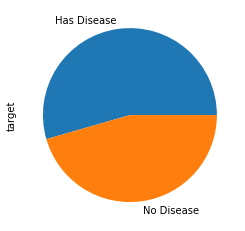

In [31]:
df['target'].value_counts().plot.pie(labels=["Has Disease","No Disease"])

In [32]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [34]:
# Data describe
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Heart Disease eccording to sex 

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

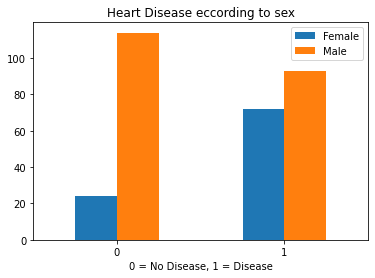

In [95]:
pd.crosstab(df['target'],df['sex']).plot.bar().legend(["Female", "Male"])
plt.title("Heart Disease eccording to sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.xticks(rotation=0)

# Age vs. Max heart Rate for Heart Disease

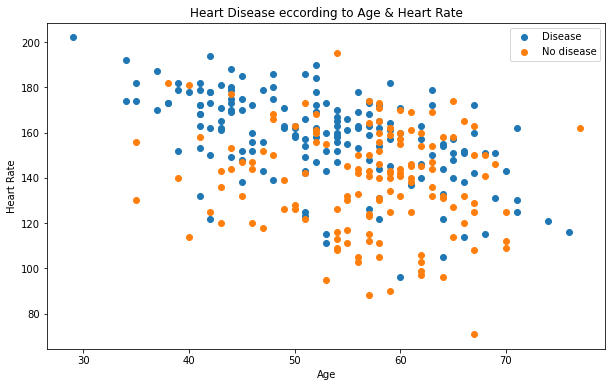

In [87]:
plt.figure(figsize=(10,6))
plt.scatter(df['age'][df['target']==1],df['thalach'][df['target']==1])
plt.scatter(df['age'][df['target']==0],df['thalach'][df['target']==0])
plt.title("Heart Disease eccording to Age & Heart Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(["Disease","No disease"])

* cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

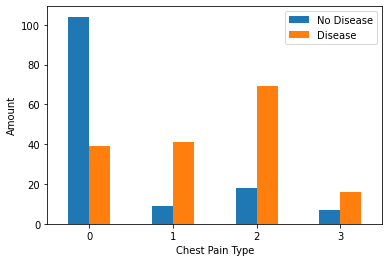

In [94]:
pd.crosstab(df['cp'],df['target']).plot.bar().legend(["No Disease", "Disease"])
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.xticks(rotation=0)